# Exploratory Data Analysis in Action - Data preparation

In this notebook we apply some usefull techniques for cleaning and organizing our data set.


**Import statements**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Global settings**

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100
#pd.set_option('display.max_colwidth', -1)
plt.rcParams["figure.figsize"] = [15,6]

## Cleaning and organizing data

![](./_img/Time_data_science.png)

Source: [Gil Press (2016)](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#55852a146f63)

**Load data set**

In [3]:
PATH = "../datasets/"
df_raw = pd.read_csv(PATH + "operations.csv", low_memory=False)

## Data cleaning

[Data cleansing or data cleaning](https://en.wikipedia.org/wiki/Data_cleansing) is the process of **detecting and correcting (or removing) corrupt or inaccurate records** from a record set, table, or database and refers to **identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data**.

In [4]:
df_clean = df_raw.copy()

In [5]:
df_clean.sample(10)

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,Aircraft Lost,High Explosives,High Explosives Type,High Explosives Weight (Pounds),High Explosives Weight (Tons),Incendiary Devices,Incendiary Devices Type,Incendiary Devices Weight (Pounds),Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
157511,157973,7/5/1944,PTO,USA,7 AF,73 FS,P47,NaN,10,NaN,NaN,NaN,NaN,NaN,MARIANAS ISLANDS,TINIAN,GUN POSITIONS,NaN,1,15.033333,145.833333,40.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,8.0,500 LB GP (GP-M43/M64),NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,25938.0
115144,115605,4/29/1945,MTO,USA,9 AF,NaN,A26,NaN,NaN,NaN,NaN,NaN,NaN,90794,ITALY,46 20 N 011 00 E,FIRE,TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED ...,1,46.330000,11.000000,145.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,225143.0
52402,52498,3/29/1945,MTO,USA,12 AF,NaN,A20,NaN,NaN,NaN,NaN,NaN,NaN,90716,ITALY,45 20 N 011 40 E,RR BRIDGE,BRIDGES,1,45.330000,11.670000,60.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,219829.0
160742,161204,1/21/1945,PTO,USA,5 AF,501 BS,B25,NaN,1,NaN,NaN,NaN,NaN,NaN,PHILIPPINE ISLANDS,BAGUIO,RAILWAY TUNNEL,NaN,1,16.416667,120.583333,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,1000 LB GP (GP-M44/M65),NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,14353.0
48108,48179,2/24/1944,ETO,USA,9 AF,NaN,GB17,NaN,NaN,NaN,NaN,NaN,NaN,99997,GERMANY,CITY TOT UNDER 6 TON,UNIDENTIFIED TARGETS,UNIDENTIFIED TARGETS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162694.0
45353,45354,2/20/1944,PTO,USA,5 AF,64 BS,B24,NaN,1,NaN,NaN,NaN,NaN,NaN,NEW GUINEA,ALEXISHAFEN,UNIDENTIFIED TARGET,NaN,2,-5.083333,145.783333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,1000 LB GP (GP-M44/M65),NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,5982.0
64113,64259,10/7/1944,ETO,GREAT BRITAIN,RAF,NaN,HVY,NaN,NaN,NaN,NaN,NaN,NaN,14129,HOLLAND OR NETHERLANDS,FLUSHING,GUN EMPLACEMENTS,GUN EMPLACEMENTS,NaN,51.400000,3.530000,NaN,62.0,62.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,428.0,NaN,NaN,296745.0
126171,126632,6/6/1944,ETO,NaN,NaN,NaN,B24,NaN,NaN,NaN,NaN,NaN,NaN,34584,FRANCE,PORT EN BESSIN,NaN,TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED ...,1,49.330000,0.730000,180.0,14.0,14.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,102721.0
167559,168021,2/1/1945,ETO,NaN,NaN,NaN,GB17,NaN,NaN,NaN,NaN,NaN,NaN,90089,GERMANY,48 40 N 0 8 40 E,UNIDENTIFIED TARGET,UNIDENTIFIED TARGETS,3,48.670000,8.670000,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,184867.0
30474,30475,3/15/1945,ETO,NaN,NaN,NaN,GB17,NaN,NaN,NaN,NaN,NaN,NaN,48322,GERMANY,ZOSSEN,NaN,TACTICAL TARGETS: (UNIDENTIFIED OR NOT LISTED ...,1,52.220000,13.450000,248.0,12.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,30.0,NaN,NaN,218162.0


## Open issues: Deal with incomplete, incorrect, inaccurate or irrelevant parts of the data

-  Identify    
-  Correct
-  Spatial subsetting the data set

### Dealing with incomplete data (`NaN`)

Missing values in data sets are a well-known problem as nearly everywhere, where data is measured and recorded, issues with missing values occur. Various reasons lead to missing values: values may not be measured, values may be measured but get lost or values may be measured but are considered unusable. Missing values can lead to problems, because often further data processing and analysis steps rely on complete data sets. Therefore missing values need to be replaced with reasonable values. In statistics this process is called **imputation**.

When faced with the problem of missing values it is important to understand the mechanism that causes missing data. Such an understanding is useful, as it may be employed as background knowledge for selecting an appropriate imputation strategy. 

**Check for `NaN` **

Note that in many cases missing values are assigned special characters, such as `-999`, `NA`, `k.A.` etc.; hence, you as a data analyst are responsible for taking appropriate action.    

In [6]:
df_clean.shape[0]

178281

In [7]:
df_clean.isnull().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

In [8]:
df_clean.notnull().sum()

Mission ID                               178281
Mission Date                             178281
Theater of Operations                    175123
Country                                  126494
Air Force                                126444
Unit ID                                   50913
Aircraft Series                          178165
Callsign                                     21
Mission Type                              47186
Takeoff Base                               3383
Takeoff Location                           3338
Takeoff Latitude                           2981
Takeoff Longitude                          2980
Target ID                                127406
Target Country                           177682
Target City                              176018
Target Type                              146370
Target Industry                          126479
Target Priority                          134720
Target Latitude                          169565
Target Longitude                        

**Strategies to deal with missing data in Python**

In general there are many options to consider when imputing missing values, for example:
* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

There are some libraries implementing more or less advanced missing value imputation strategies such as 

* [`statsmodels`](http://www.statsmodels.org/dev/imputation.html) ([Multiple Imputation with Chained Equations (MICE)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/))
* [`fancyimpute`](https://github.com/iskandr/fancyimpute) (matrix completion and imputation algorithms)
* [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) (mean, median, most frequent)
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) ([`fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html), [`interpolate`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html) methods)


**Our working strategy to deal with missing data**

_Owing to the fact that the amount of missing values in our data set is considerble high and thet probably our domain knowledge with respect to World War II histroy is limited simply remove all features of the data set where more the 50% of the data is missing._  
> **Challenge**: Write a function (or a script) which takes in our data set and a threshold value of 0.5 and which returns the column names of features that include more data than the given threshold. We then use the returned column names for subsetting our data set. 

In [9]:
def features_above_threshold(df, threshold=0.5):
    ## your code here ...
    pass

In [10]:
%%writefile ../src/_solutions/features_above_threshold.py
## soution challenge 
def features_above_threshold(df, threshold=0.5):    
    cols2keep = df.notnull().sum()/df.shape[0] > threshold 
    rv = df.columns[cols2keep.values]
    return rv

Overwriting ../src/_solutions/features_above_threshold.py


In [11]:
# %load ../src/_solutions/features_above_threshold.py

In [12]:
# %load ../src/_solutions/features_above_threshold.py
## soution challenge 
def features_above_threshold(df, threshold=0.5):    
    cols2keep = df.notnull().sum()/df.shape[0] > threshold 
    rv = df.columns[cols2keep.values]
    return rv

**Apply `features_above_threshold` on our data set**

In [13]:
cols2keep = features_above_threshold(df_clean, threshold=0.5)
cols2keep

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Aircraft Series', 'Target ID', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'High Explosives Weight (Tons)',
       'Total Weight (Tons)', 'Source ID'],
      dtype='object')

**Reassign subsetted data set to the variable `df_clean`**

In [14]:
df_clean = df_clean[cols2keep]
df_clean.shape

(178281, 19)

In [15]:
df_clean.sample(3)

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),Source ID
127417,127878,6/7/1944,PTO,USA,13 AF,P38,NaN,BISMARK ARCHIPELAGO,KOKOPO,SUPPLY AREA,NaN,1,-4.50,152.25,45.0,7.0,7.0,7.0,39003.0
165505,165967,7/14/1944,MTO,USA,12 AF,B25,34623,ITALY,PORTO CORSINI,FUEL DUMP,SUPPLY DUMPS AND WAREHOUSES,2,44.48,12.28,89.0,6.0,12.0,12.0,105254.0
2229,2230,7/31/1944,ETO,NaN,NaN,B24,23654,FRANCE,LAON,NaN,AIR FIELDS AND AIRDROMES,1,49.57,3.63,254.0,9.0,23.0,23.0,209681.0


In [16]:
df_clean.isnull().sum()

Mission ID                           0
Mission Date                         0
Theater of Operations             3158
Country                          51787
Air Force                        51837
Aircraft Series                    116
Target ID                        50875
Target Country                     599
Target City                       2263
Target Type                      31911
Target Industry                  51802
Target Priority                  43561
Target Latitude                   8716
Target Longitude                  8738
Altitude (Hundreds of Feet)      57455
Attacking Aircraft               53173
High Explosives Weight (Tons)    32080
Total Weight (Tons)              11773
Source ID                         4045
dtype: int64

### Dealing with incorrect data (looking for outliers)

* **Check that mission dates are bewteen 1939 and 1945**

In [17]:
df_clean["Mission Date"].dtype

dtype('O')

In [18]:
df_clean.loc[0:15, "Mission Date"]

0     8/15/1943
1     8/15/1943
2     8/15/1943
3     8/15/1943
4     8/15/1943
5     8/15/1943
6     8/15/1943
7     8/15/1943
8     8/15/1943
9     8/15/1943
10    8/15/1943
11    8/15/1943
12    8/15/1943
13    8/15/1943
14    8/15/1943
15    8/15/1943
Name: Mission Date, dtype: object

> **Challenge**: Reassign the `Mission Date` variable, a `string` object with o a time-aware `datetime` object.    
_Hint: pandas comes with a_ `.to_datetime` _method_


In [19]:
## your code here ...

In [20]:
%%writefile ../src/_solutions/infere_mission_data.py
df_clean["Mission Date"] = pd.to_datetime(df_clean["Mission Date"], infer_datetime_format=True)

Overwriting ../src/_solutions/infere_mission_data.py


In [21]:
# %load ../src/_solutions/infere_mission_data.py

In [22]:
# %load ../src/_solutions/infere_mission_data.py
df_clean["Mission Date"] = pd.to_datetime(df_clean["Mission Date"], infer_datetime_format=True)

In [23]:
df_clean["Mission Date"].head()

0   1943-08-15
1   1943-08-15
2   1943-08-15
3   1943-08-15
4   1943-08-15
Name: Mission Date, dtype: datetime64[ns]

Once we have a `datetime` object we can use it to extract the year, month and day assign those to a unique columns in out data set (`year`, `month` and `day`)

In [24]:
df_clean["year"] = df_clean["Mission Date"].dt.year
df_clean["month"] = df_clean["Mission Date"].dt.month
df_clean["day"] = df_clean["Mission Date"].dt.day

In [25]:
df_clean[["Mission Date", "year", "month", "day"]].sample(10)

,Mission Date,year,month,day
128321,1944-12-18,1944,12,18
166571,1945-01-31,1945,1,31
39757,1944-09-12,1944,9,12
143288,1944-12-31,1944,12,31
31780,1944-09-03,1944,9,3
112610,1944-11-30,1944,11,30
17267,1944-08-14,1944,8,14
27562,1944-08-26,1944,8,26
171616,1944-07-21,1944,7,21
4489,1943-09-02,1943,9,2


Finally we ask for the minimum and the maximum value of the `year` column.

In [26]:
print(df_clean["year"].min())
print(df_clean["year"].max())

1939
1945


* __Check if the values in the altitude column (`Altitude (Hundreds of Feet)`) is within reasonable bounds__ 

> __Challenge__: Add a new column to the data set (`Altitude (meters)`) by transforming th values in the `Altitude (Hundreds of Feet)` from feet to meters.   
_Hint: You may use the `apply` method._

$$1\;\text{foot} =  0.3048\; \text{meter}$$

In [27]:
## your code here ...
df_clean["Altitude (meters)"] = None 

In [28]:
%%writefile ../src/_solutions/altitude_in_meters.py
df_clean["Altitude (meters)"] = df_clean["Altitude (Hundreds of Feet)"].apply(lambda x: x*100*0.3048)

Overwriting ../src/_solutions/altitude_in_meters.py


In [29]:
#load ../src/_solutions/altitude_in_meters.py

In [30]:
# %load ../src/_solutions/altitude_in_meters.py
df_clean["Altitude (meters)"] = df_clean["Altitude (Hundreds of Feet)"].apply(lambda x: x*100*0.3048)

In [31]:
df_clean["Altitude (meters)"].describe()

count    1.208260e+05
mean     4.237537e+03
std      5.694221e+03
min      0.000000e+00
25%      2.133600e+03
50%      3.718560e+03
75%      6.797040e+03
max      1.219200e+06
Name: Altitude (meters), dtype: float64

In [32]:
df_clean["Altitude (meters)"].max()

1219200.0

Considering the output from above and answers to the question "_At what altitude could WW2 planes fly?_" on [Quora](https://www.quora.com/At-what-altitude-could-WW2-planes-fly-What-was-the-record-altitude-during-the-war-and-what-planes-could-fly-at-a-high-altitude-Could-they-fly-at-the-same-altitude-as-these-days-or-not), indicating that flight heights above 40,000 feet (approx. 12,000 m) occured rarely.

> __Challenge__: Limit the reported altitudes to 15,000 m and replace  outliers with `np.nan`.

In [33]:
max_height = 15000
print((df_clean["Altitude (meters)"] > max_height).sum())

26


In [34]:
## your code here ...

In [35]:
%%writefile ../src/_solutions/limit_altitude.py

# replace values with np.nan
df_clean.loc[df_clean["Altitude (meters)"] > max_height, "Altitude (meters)"] = np.nan

Overwriting ../src/_solutions/limit_altitude.py


In [36]:
# %load ../src/_solutions/limit_altitude.py

In [37]:
# %load ../src/_solutions/limit_altitude.py

# replace values with np.nan
df_clean.loc[df_clean["Altitude (meters)"] > max_height, "Altitude (meters)"] = np.nan

In [38]:
# check replacement
print((df_clean["Altitude (meters)"] > max_height).sum())

df_clean["Altitude (meters)"].describe()

0


count    120800.000000
mean       4193.066365
std        2685.069721
min           0.000000
25%        2133.600000
50%        3718.560000
75%        6797.040000
max       14173.200000
Name: Altitude (meters), dtype: float64

* __Check if the values in the target location columns (`Target Latitude` and `Target Longitude`) is within reasonable bounds__.

Note that the loaction is given in geographic coordinates, hence, the values should be within -90 to 90 degree latitude and -180 to 180 degree longitude.

In [39]:
df_clean[['Target Latitude', 'Target Longitude']].describe()

,Target Latitude,Target Longitude
count,169565.000000,169543.000000
mean,38.067793,43.340213
std,18.711405,59.681160
min,-37.416667,-179.451285
25%,26.250000,7.620000
50%,47.500000,11.330000
75%,50.930000,97.400000
max,1108.000000,1000.650000


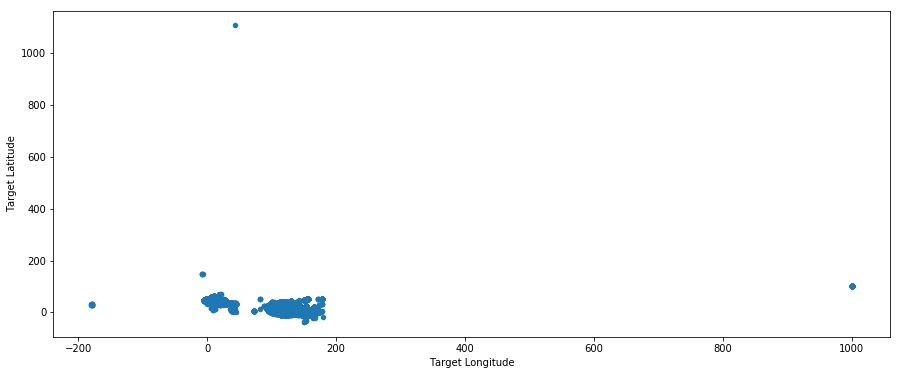

In [40]:
df_clean.plot.scatter( x='Target Longitude', y='Target Latitude');

Considering the table and the plot above there are some deviations from the expected values.

> __Challenge__: Replace geographical coordinates ouside the natural limits [-90, 90] degrees latitude and [-180, 180] degrees longitude with `np.nan`.

In [41]:
## your code here ...

In [42]:
%%writefile ../src/_solutions/limit_coordinates.py
print(df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']].count())

df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']] = np.nan

Overwriting ../src/_solutions/limit_coordinates.py


In [43]:
# %load ../src/_solutions/limit_coordinates.py

In [44]:
# %load ../src/_solutions/limit_coordinates.py
print(df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']].count())

df_clean.loc[((df_clean['Target Longitude'] > 180) |
                    (df_clean['Target Longitude'] < -180) | 
                    (df_clean['Target Latitude'] > 90 )| 
                    (df_clean['Target Latitude'] < -90)), 
                   ['Target Longitude', 'Target Latitude']] = np.nan

Target Longitude    120
Target Latitude     120
dtype: int64


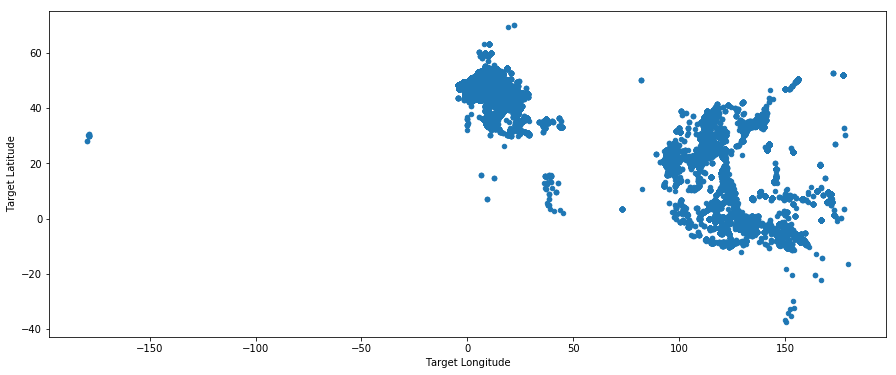

In [45]:
# check result
df_clean.plot.scatter( x='Target Longitude', y='Target Latitude');

### Dealing with irrelevant data

Our data set, as well as other data sets we encounter, sometimes come with features which are irrelevant for the purpose our research question. Hence, to reduce the data set size for the purpose of better readability as well as memory issues, amomg other, we may drop data columns. However, once again domain knowledge helps to deceide which columns are of interest or not.   

In [46]:
df_clean.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Aircraft Series', 'Target ID', 'Target Country',
       'Target City', 'Target Type', 'Target Industry', 'Target Priority',
       'Target Latitude', 'Target Longitude', 'Altitude (Hundreds of Feet)',
       'Attacking Aircraft', 'High Explosives Weight (Tons)',
       'Total Weight (Tons)', 'Source ID', 'year', 'month', 'day',
       'Altitude (meters)'],
      dtype='object')

In [47]:
df_clean.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Target ID,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude,Altitude (Hundreds of Feet),Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),Source ID,year,month,day,Altitude (meters)
0,1,1943-08-15,MTO,USA,12 AF,A36,40675,ITALY,SPADAFORA,NaN,NaN,NaN,38.220000,15.370000,NaN,NaN,10.0,10.0,NaN,1943,8,15,NaN
1,2,1943-08-15,PTO,USA,5 AF,B24,NaN,NEW GUINEA,KOMIATUM,RIDGE,NaN,1,-7.166667,147.000000,44.0,6.0,20.0,20.0,9366.0,1943,8,15,1341.12
2,3,1943-08-15,MTO,USA,12 AF,A36,9630,ITALY,COSENZA,NaN,NaN,NaN,39.270000,16.250000,NaN,NaN,9.0,9.0,NaN,1943,8,15,NaN
3,4,1943-08-15,MTO,USA,12 AF,A36,16140,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.430000,15.900000,NaN,NaN,7.5,7.5,NaN,1943,8,15,NaN
4,5,1943-08-15,PTO,USA,5 AF,B24,NaN,SUMATRA,KILA,VILLAGE,NaN,1,-1.116667,103.883333,60.0,6.0,8.0,8.0,22585.0,1943,8,15,1828.80


Exploring the data set above we deceide to drop the columns `Theater of Operations`, `Air Force`, `Target ID`, `Target Priority`, `Altitude (Hundreds of Feet)`, `Source ID`. 


In [48]:
cols2exlude = ['Theater of Operations', 'Air Force', 'Target ID', 
               'Target Priority', 'Altitude (Hundreds of Feet)', 'Source ID']

One way to achieve this task with Python is to use the powerful [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).  

    df_clean = df_clean[[c for c in df_clean.columns if c not in cols2exlude]] 
 
Another way is to leverage the pandas functionality and use the `drop` method. Note that for the purpose of memory and computation efficiancy in many cases pandas returns a view of the object, rather than a copy. Hence, if to make a permanent change we have to assign/reassign the object to a variable:

    df_clean = df_clean.drop(cols2exlude, axis=1)

or use the `inplace=True` argument:

    df_clean.drop(cols2exlude, axis=1, inplace=True)



In [49]:
df_clean.drop(cols2exlude, axis=1, inplace=True)

In [50]:
# check operation
df_clean.columns

Index(['Mission ID', 'Mission Date', 'Country', 'Aircraft Series',
       'Target Country', 'Target City', 'Target Type', 'Target Industry',
       'Target Latitude', 'Target Longitude', 'Attacking Aircraft',
       'High Explosives Weight (Tons)', 'Total Weight (Tons)', 'year', 'month',
       'day', 'Altitude (meters)'],
      dtype='object')

### Spatial subsetting the data set

In [51]:
df_subset = df_clean.copy()

Some of you may have already noticed that the data set contains data of aerial bombing during World War II for all araound the world. In this tutorial however, we want to focus on Europe. Hence, we are going to subset the data set accordingly.

Owing to the maifold of spatial data representation, working with spatial data becomes sometimes more involed. In this section we make use third party libraries, such as [GeoPandas](http://geopandas.org/index.html) and [shapely](http://toblerity.org/shapely/), which abstract away many algorithmic or computational issues related to spatial data processing and plotting by integrating the workshorses of geospatial computing, such as [GEOS](http://trac.osgeo.org/geos/), [GDAL](http://www.gdal.org/), [OGR](http://gdal.org/1.11/ogr/) and [proj.4](http://proj4.org/), among others.


**Transform the variables `Target Latitude` and `Target Longitude` to spatial coordinates**

In [52]:
df_subset[['Target Latitude', 'Target Longitude']].head() 

,Target Latitude,Target Longitude
0,38.220000,15.370000
1,-7.166667,147.000000
2,39.270000,16.250000
3,38.430000,15.900000
4,-1.116667,103.883333


In [53]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df_subset['Target Longitude'], df_subset['Target Latitude'])]
geometry[0:5]

**Use the GeoPandas to make a pandas `DataFrame` spatially aware.**


[GeoPandas](http://geopandas.org/index.html) extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](http://toblerity.org/shapely/). GeoPandas further depends on [fiona](http://toblerity.org/fiona/README.html) for file access and descartes and [matplotlib](https://matplotlib.org/) for plotting.

It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. 

In [54]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(df_subset, geometry=geometry)
gdf.head()

,Mission ID,Mission Date,Country,Aircraft Series,Target Country,Target City,Target Type,Target Industry,Target Latitude,Target Longitude,Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),year,month,day,Altitude (meters),geometry
0,1,1943-08-15,USA,A36,ITALY,SPADAFORA,NaN,NaN,38.220000,15.370000,NaN,10.0,10.0,1943,8,15,NaN,POINT (15.37 38.22)
1,2,1943-08-15,USA,B24,NEW GUINEA,KOMIATUM,RIDGE,NaN,-7.166667,147.000000,6.0,20.0,20.0,1943,8,15,1341.12,POINT (147 -7.166666667)
2,3,1943-08-15,USA,A36,ITALY,COSENZA,NaN,NaN,39.270000,16.250000,NaN,9.0,9.0,1943,8,15,NaN,POINT (16.25 39.27)
3,4,1943-08-15,USA,A36,ITALY,GIOJA TAURO,NaN,NaN,38.430000,15.900000,NaN,7.5,7.5,1943,8,15,NaN,POINT (15.9 38.43)
4,5,1943-08-15,USA,B24,SUMATRA,KILA,VILLAGE,NaN,-1.116667,103.883333,6.0,8.0,8.0,1943,8,15,1828.80,POINT (103.8833333 -1.116666667)


**Make sure that for every entry we have a valid spatial coordinates**

In [55]:
print(gdf.shape)
# subset only vaild spatial coordinates
gdf = gdf.loc[gdf[['Target Longitude', 'Target Latitude']].notnull().all(axis = 1)]
print(gdf.shape)
gdf[['Target Longitude', 'Target Latitude']].isnull().sum()

(178281, 18)
(169423, 18)


Target Longitude    0
Target Latitude     0
dtype: int64

**Assign a spatial coordinate reference system (`crs`) to our geopdandas object**


In general the CRS may be defined in several ways, for example the CRS may be defined as [Well-known text (WKT)](https://en.wikipedia.org/wiki/Well-known_text) format, or [JSON](https://en.wikipedia.org/wiki/JSON) format, or [GML](https://en.wikipedia.org/wiki/Geography_Markup_Language) format, or in the [Proj4](https://en.wikipedia.org/wiki/PROJ.4) format, among many others.

The Proj4 format is a generic, string-based description of a CRS. It defines projection types and parameter values for particular projections. For instance the Proj4 format string for the [European Terrestrial Reference System 1989 (ETRS89)](https://en.wikipedia.org/wiki/European_Terrestrial_Reference_System_1989) is:

    +proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no\_defs


With respect to the enormous amount of existing CRS the [International Association of Oil & Gas Producers (IOGP)](https://en.wikipedia.org/wiki/International_Association_of_Oil_%26_Gas_Producers), formerly known as **_European Petroleum Survey Group (EPSG)_**, built a collection of definitions for global, regional, national and local coordinate reference systems and coordinate transformations, the [EPSG Geodetic Parameter Dataset](http://www.epsg.org/). Within this collection each particular coordinate reference systems gets an unique integer identifier, commonly denoted as EPSG. For instance, the EPSG identifier for the the latest revision of the [World Geodetic System (WGS84)](https://en.wikipedia.org/wiki/World_Geodetic_System) is simply [4326](http://spatialreference.org/ref/epsg/4326/).


A nice look up page for different coordinate reference systems is found [here](https://epsg.io/) and a fancy visualization of many prominent map projections is found [here](https://bl.ocks.org/mbostock/raw/3711652/).


In [56]:
gdf.crs = {'init' :'epsg:4326'}

### Context matters: Load _Natural Earth countries_ dataset, bundled with GeoPandas

[Natural Earth](http://www.naturalearthdata.com/) is a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. Featuring tightly integrated vector and raster data, with Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software. A subset comes bundled with GeoPandas and is accessible from the gpd.datasets module. We’ll use it as a helpful global base layer map.



In [57]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...


In [58]:
world.crs

{'init': 'epsg:4326'}

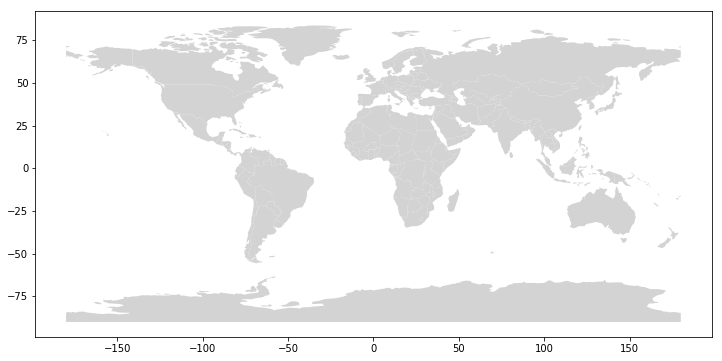

In [59]:
world.plot(facecolor='lightgray');

**Combine world map and the Aerial Bombing data set**

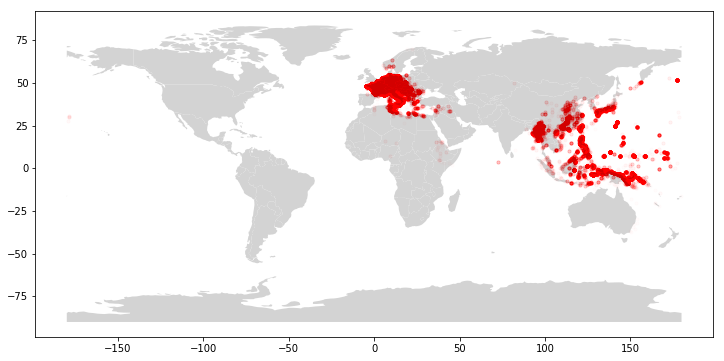

In [60]:
base = world.plot(facecolor='lightgray')
gdf.plot(ax=base, marker='o', color='red', markersize=10, alpha=0.01);

As indicated above we want to focus on Europe. For that we first want to know how many times the targets in our data set we in Germany, France or Italy. 

In [61]:
percent = (int(np.round(gdf["Target Country"].
                        isin(["GERMANY", "FRANCE", "ITALY"]).sum()/gdf.shape[0] * 100)))

print("Approximately {}% of the targets in our data set are located in Germany, France or Italy.".format(percent))

Approximately 61% of the targets in our data set are located in Germany, France or Italy.


Then, we want to restict our analysis to data points, which refere to an area within Europe. Altough it is not straighforward to define Europe as an entity, in terms of geography, politics or sphere of cultural identiy, we define Europe as an area between the coordinates 

$$\text{33.0 to 73.5°N and 27.0°W to 45.0°E.}$$

In order to represent that area spatialy; we construct a `Polygon` object to represeent the [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) of Europe. 

In [62]:
from shapely.geometry import Polygon
# generate geopandas object
poly_europe = gpd.GeoSeries([Polygon([(-27,33), (45,33), (45,73.5), (-27,73.5)])])
bb_europe = gpd.GeoDataFrame({'geometry': poly_europe})
# assign crs
bb_europe.crs = {'init':'epsg:4326'}
bb_europe

,geometry
0,"POLYGON ((-27 33, 45 33, 45 73.5, -27 73.5, -2..."


**Plot world map and bounding box of Europe**

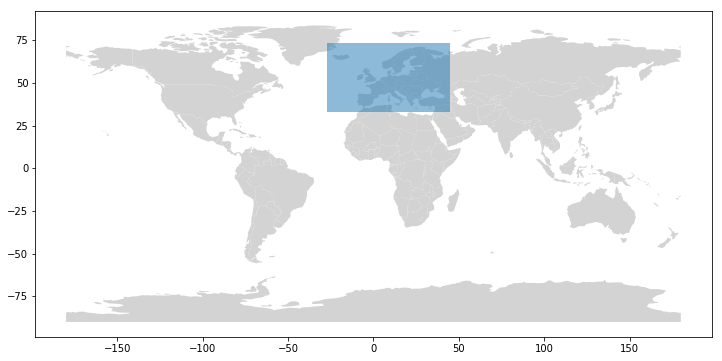

In [63]:
base=world.plot(facecolor='lightgray')
bb_europe.plot(ax=base, alpha=0.5);

**Subset (intersect) the GeoPandas `DataFrame` with the bounding box of Europe**

In [64]:
gdf_europe = gpd.sjoin(gdf, bb_europe, how="inner", op='intersects',).drop("index_right", axis=1)

print(gdf_europe.shape)

(120068, 18)


In [65]:
gdf_europe.sample(5)

,Mission ID,Mission Date,Country,Aircraft Series,Target Country,Target City,Target Type,Target Industry,Target Latitude,Target Longitude,Attacking Aircraft,High Explosives Weight (Tons),Total Weight (Tons),year,month,day,Altitude (meters),geometry
92979,93385,1945-04-17,USA,A26,ITALY,45 00 N 011 00 E,RIVER CROSS NG,WATERWAYS AND BOATS,45.00,11.00,1.0,1.0,1.0,1945,4,17,1981.20,POINT (11 45)
98520,98942,1941-08-12,GREAT BRITAIN,WELL,GERMANY,LUNEBURG,CITY AREA,CITIES TOWNS AND URBAN AREAS,53.27,10.42,1.0,1.0,1.0,1941,8,12,NaN,POINT (10.42 53.27)
69049,69218,1944-04-03,USA,B17,HUNGARY,BUDAPEST,AC COMPONENT PLANTS,A/C COMPONENT PLANTS,47.50,19.03,28.0,84.0,84.0,1944,4,3,6766.56,POINT (19.03 47.5)
153783,154245,1943-04-25,USA,A20,TUNISIA,36 20 N 010 00 E,GUNS,GUN EMPLACEMENTS,36.33,10.00,NaN,NaN,NaN,1943,4,25,NaN,POINT (10 36.33)
137340,137801,1944-06-14,NaN,B26,FRANCE,ST HILAIRE DU HARCO,NaN,BRIDGES,48.57,1.08,NaN,71.0,71.0,1944,6,14,3657.60,POINT (1.08 48.57)


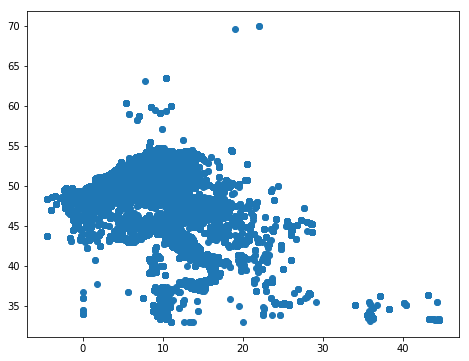

In [66]:
gdf_europe.plot();

**In order to keep the spatial context we extract the area of Europe from the world map**

In [67]:
europe = gpd.overlay(world, bb_europe, how='intersection')
europe.crs = {'init': 'epsg:4326'}

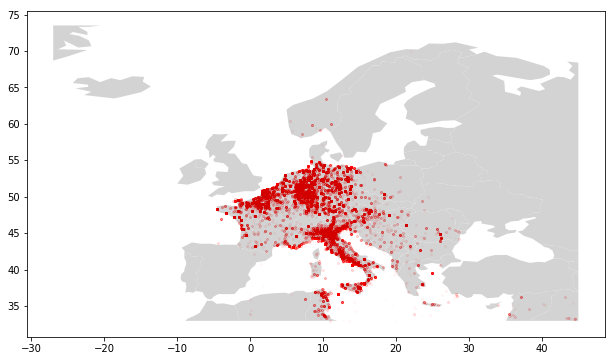

In [68]:
base = europe.plot(facecolor='lightgray')
gdf_europe.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.01);

### Ready!

So now we have everything we need, a cleaned and subsetted data set `gdf_europe` and a spatial representation of Europe, `europe`, both in form of Geopandas `DataFrame` objects.


For further usage we write the Geopandas `GeoDataFrame` objects to disk. GeoDataFrames can be exported to many different standard formats using the `GeoDataFrame.to_file()` method. Howerver, for the purpose of this tutorial we serialize the data by appling the [`pickle` module](https://docs.python.org/3/library/pickle.html). 

In [69]:
## uncomment to serialize the data to disk
import pickle
pickle.dump(gdf_europe, open("../datasets/gdf_europe.p", "wb"))
pickle.dump(europe, open("../datasets/europe.p", "wb"))

## (Optional) Advanced spatial plotting using cartopy

In [70]:
import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'src'))
sys.path.append(src_dir)
print(src_dir)

C:\Users\josi\Documents\workshop-data-science\src


In [71]:
import helper_funcs as hf

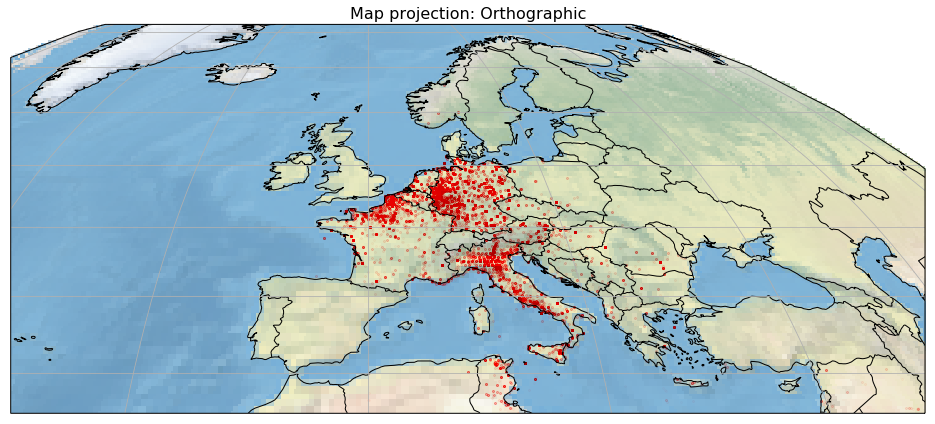

In [72]:
hf.cuteplot(gpd_df=gdf_europe, crs="Orthographic", title="Map projection: Orthographic")

Note that the following loop may take some time, as each plot consists of 100,000+ data points.

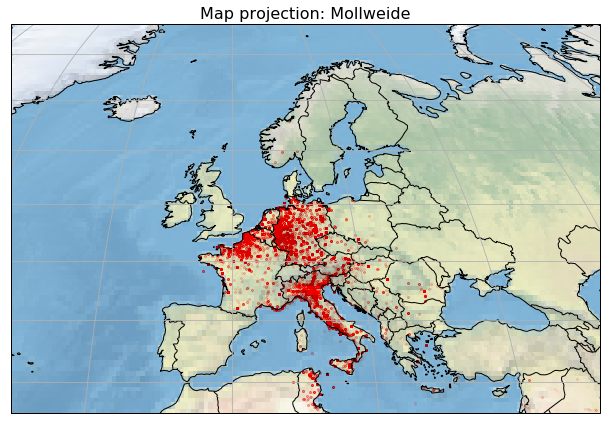

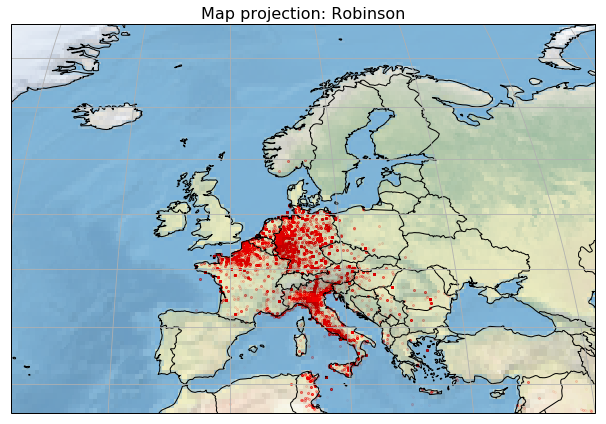

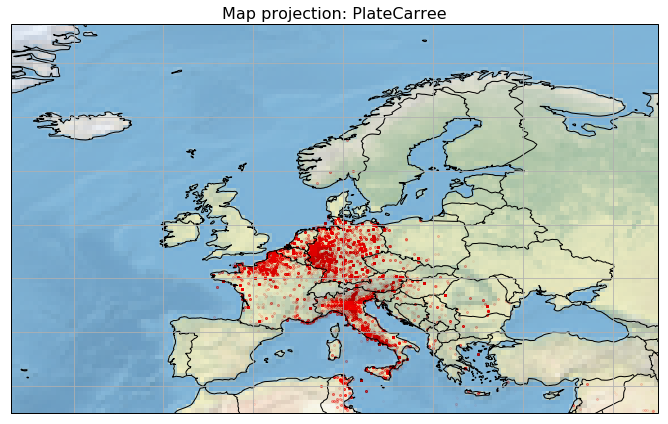

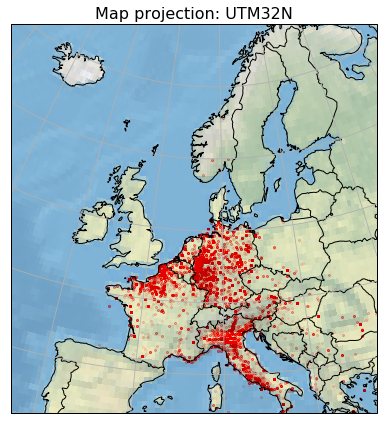

In [73]:
for proj in ["Mollweide", "Robinson", "PlateCarree", "UTM32N"]:
    hf.cuteplot(gpd_df=gdf_europe, crs=proj, title="Map projection: " + proj)

If you want to get more intuition about map projections and its effetcs on area, shape and angles check out [Tissot's indicatrix](https://en.wikipedia.org/wiki/Tissot%27s_indicatrix). By the way there is a nice implementation of Tissot's indicatrix in [cartopy](http://scitools.org.uk/cartopy/docs/v0.15/index.html#) library. See an example [here](http://scitools.org.uk/cartopy/docs/v0.15/examples/tissot.html).